
# Welcome to the IndabaX 2024 Guided Hackathon with Isazi!


## 1. Introduction
*********************************

#### 1.1. Problem Domain

In the fast-paced retail sector, understanding and predicting sales volumes is crucial for effective inventory management, pricing strategy, and promotional planning. Accurately forecasting sales not only optimizes operational efficiencies but also enhances customer satisfaction by ensuring product availability and competitive pricing.

#### 1.2 Challenge Description

Participants are tasked with developing a predictive model that forecasts the future sales volumes of various products based on historical sales data. The dataset provided includes daily sales figures, promotional activities, and pricing information. The primary objective is to predict the volume of product sales for upcoming dates, which is critical for managing supply chain and marketing strategies.

#### 1.3. Objectives
- **Feature Engineering**: Identify and harness the influence of promotional activities and pricing strategies on sales volumes.
- **Model Development**: Build robust time series forecasting models that can accurately predict sales volumes.

#### 1.4. Evaluation Criteria

The evaluation of forecasting models in this challenge uses two primary metrics: Overall Forecast Accuracy and Relative Bias. These metrics are calculated as follows:

1. **Total Sales Volume**: Sum the actual sales volumes across all time series to obtain the total actual volume.
2. **Total Predicted Volume**: Sum the predicted sales volumes across all time series.
3. **Total Error**: Compute the absolute error between predicted and actual sales volumes for each prediction, and then sum these errors across all time series.
4. **Relative Error**: Divide the total error by the total actual volume to obtain the relative error.
5. **Forecast Accuracy**: Calculate forecast accuracy as `1 - Relative Error`.
6. **Relative Bias**: Compute the relative bias by subtracting the total actual volume from the total predicted volume and dividing the result by the total actual volume. This metric indicates the tendency of the models to overestimate or underestimate the sales volumes.

These metrics ensure a comprehensive evaluation of model performance:
- **Forecast Accuracy** emphasizes the precision of individual predictions and is weighted towards time series with higher sales volumes, which are more significant for overall business performance.
- **Relative Bias** measures the overall tendency of the predictions to be higher or lower than actual values, providing insight into the systemic accuracy of the models.

Models will be judged not only on how accurately they predict sales volumes but also on how well they maintain balance, avoiding systematic overestimation or underestimation of sales.

#### 1.5. Usefulness of the Challenge

The solutions developed during this hackathon will help businesses:
- **Enhance Decision Making**: Improve inventory and pricing decisions by predicting demand more accurately.
- **Optimize Promotional Strategies**: Understand the impact of various promotional tactics on sales and adjust these strategies to maximize profitability.
- **Reduce Waste and Shortages**: Better demand forecasts lead to more efficient supply chain management, reducing both excess stock and product shortages.

#### 1.6. Outcome

This challenge offers participants the opportunity to apply machine learning techniques to a real-world problem, enhancing their skills in data manipulation, model building, and evaluation. The top-performing models could potentially be implemented in real retail environments, demonstrating the practical value of predictive analytics in business contexts.

#### 1.7. Support Channels
* SwapCard Hackathon Discussion Forum

#### 1.8. Mentor and Support
* Kilian Massa

#### 1.9. Submission Process
The evaluation of forecasting models in this competition focuses on two key metrics:
Overall Forecast Accuracy and Relative Bias.

### Let's get started!

## 0. Setup
****************************************************************

#### 0.1 Mounting Google Drive

Running this Notebook on Google Colab?

* If yes, run the next cell.
* If No, Skip to 0.3: Update working directory.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

#### 0.2. Update Working Directory

In [6]:
import os
path = os.getcwd()
path

'/content'

In [7]:
!ls

data  sample_data


In [8]:
cd ...

[Errno 2] No such file or directory: '...'
/content


In [1]:
!ls

data  sample_data


#### 0.3. Install Necessary Packages

In [57]:
!pip install pandas "gluonts[mxnet, torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 32.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [11]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#### 0.4 Import Packages

In [51]:
import json  # Standard library for working with JSON data

import pandas as pd  # Powerful data manipulation and analysis library
import numpy as np  # Library for numerical computations
np.bool = np.bool_
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Data visualization library based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split  # Utility for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Utility for standardizing features by removing the mean and scaling to unit variance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating the performance of a regression model

from gluonts.dataset.pandas import PandasDataset  # GluonTS utility for creating datasets from pandas dataframes
from gluonts.evaluation.backtest import make_evaluation_predictions  # Utility for generating evaluation predictions from a trained model
from gluonts.evaluation import Evaluator  # Utility for evaluating the performance of time series forecasting models

from gluonts.mx import SimpleFeedForwardEstimator, Trainer # GluonTS classes for creating and training a simple feed-forward neural network model


#### 0.5 Define Constants

In [4]:
# Dataset paths and column definitions
time_series_id_col = 'product_code'
date_col = 'sales_date'
target_col = 'volume'
freq = "1D"
prediction_length = 28
data_path = "data/isazi_ts_dataset.csv"


## 2. Loading Data
*********************************

In [28]:
# Load the dataset
df = pd.read_csv(data_path)
# Display the first few rows of the dataset
df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


## 3. Data Preprocessing
********************************
In this section, we'll preprocess the data to make it suitable for modeling. This includes handling missing values, encoding categorical variables, and scaling numerical features.

The dataset consists of the following columns:
- `sales_date`: Date of the sales record.
- `volume`: Number of units sold.
- `rel_promo_price`: Relative promotional price.
- `is_promo`: Indicator if the item was on promotion.
- `is_single_price_promo`: Indicator if there was a single price promotion.
- `is_multibuy_promo`: Indicator if there was a multibuy promotion.
- `rsp`: Retail selling price.
- `planned_promo_vol`: Planned promotional volume.
- `product_code`: Unique product identifier.
"""

`NB`: all the promo covariates (is_promo, planned_promo_vol, rel_promo_price, is_multibuy_promo) are reported by the supplier, and the volume we are predicting is the volume sold by the retailer, i.e. the supplier is essentially giving us an estimate of the retailer's promotions.

In [29]:
# Data types and missing values
print("Data types and missing values:")
df.info()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300768 entries, 0 to 300767
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sales_date             300768 non-null  object 
 1   volume                 300768 non-null  float64
 2   rel_promo_price        300768 non-null  float64
 3   is_promo               300768 non-null  int64  
 4   is_single_price_promo  300768 non-null  int64  
 5   is_multibuy_promo      300768 non-null  int64  
 6   rsp                    300768 non-null  float64
 7   planned_promo_vol      148734 non-null  float64
 8   product_code           300768 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 20.7+ MB


In [30]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


sales_date                    0
volume                        0
rel_promo_price               0
is_promo                      0
is_single_price_promo         0
is_multibuy_promo             0
rsp                           0
planned_promo_vol        152034
product_code                  0
dtype: int64

In [31]:
# Summary statistics
print("Summary statistics:")
df.describe()

Summary statistics:


,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
count,300768.000000,300768.000000,300768.000000,300768.000000,300768.000000,300768.000000,148734.000000,300768.000000
mean,120.719591,0.874149,0.518715,0.015221,0.433071,54.571881,194.851186,196.837523
std,297.419634,0.131270,0.499650,0.122431,0.495501,30.016813,664.449917,113.669563
min,0.000000,0.241200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,30.000000,0.760300,0.000000,0.000000,0.000000,29.990000,35.685100,99.000000
50%,64.000000,0.926200,1.000000,0.000000,0.000000,47.771300,93.939800,197.000000
75%,132.000000,1.000000,1.000000,0.000000,1.000000,72.990000,200.163950,295.000000
max,32086.000000,1.000000,1.000000,1.000000,1.000000,249.990000,35945.472900,411.000000


In [32]:
#get unique product
print("Number of Unique Products:")
df['product_code'].unique().sum()

Number of Unique Products:


84666

In [33]:
# Convert 'sales_date' to datetime
df['sales_date'] = pd.to_datetime(df['sales_date'])
print("Dataset after data type conversions:")
df.dtypes

Dataset after data type conversions:


sales_date               datetime64[ns]
volume                          float64
rel_promo_price                 float64
is_promo                          int64
is_single_price_promo             int64
is_multibuy_promo                 int64
rsp                             float64
planned_promo_vol               float64
product_code                      int64
dtype: object

In [34]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Dataset after removing duplicates:")
df

Dataset after removing duplicates:


,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


In [35]:
# Handle missing values (if any)
df.ffill()
df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


## 4. Exploratory Data Analysis (EDA)
********************************

Before building the model, it's essential to understand the data through exploratory data analysis (EDA).


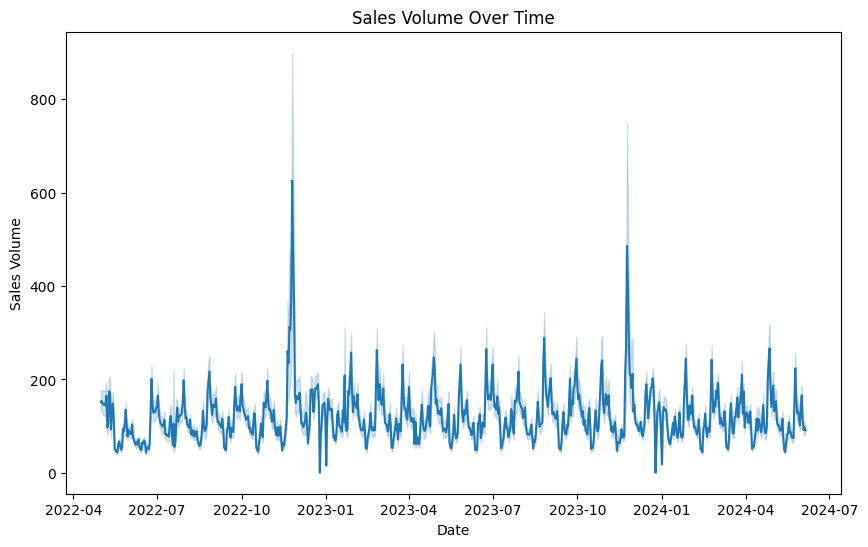

In [36]:
# Plot sales volume over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='sales_date', y='volume', data=df)
plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()

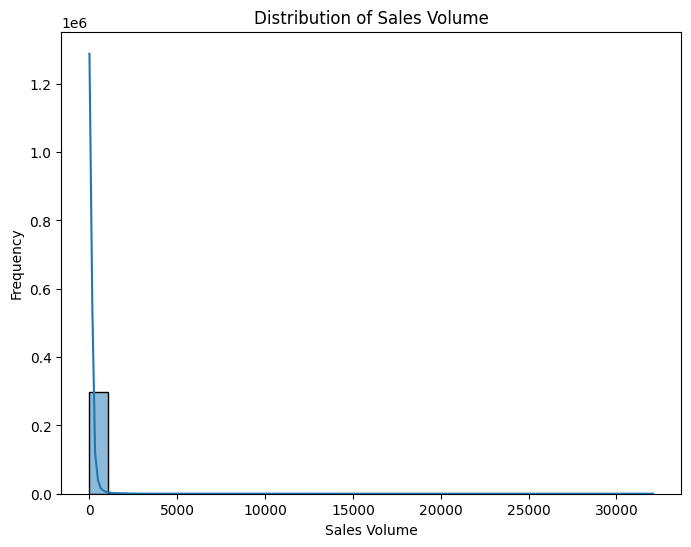

In [37]:
# Distribution of sales volume
plt.figure(figsize=(8, 6))
sns.histplot(df['volume'], bins=30, kde=True)
plt.title('Distribution of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.show()


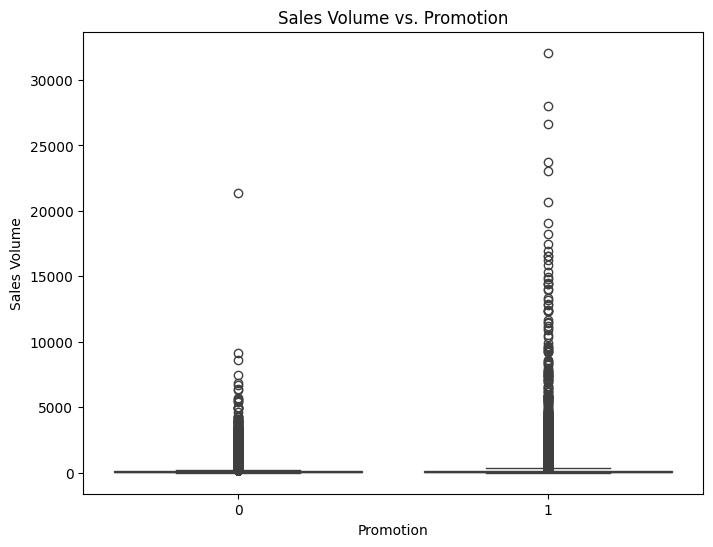

Average sales volume by promotion:
is_promo
0     96.271113
1    143.403851
Name: volume, dtype: float64


In [38]:
# Sales volume vs. promotion
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_promo', y='volume', data=df)
plt.title('Sales Volume vs. Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales Volume')
plt.show()

# Average sales volume by promotion
print("Average sales volume by promotion:")
print(df.groupby('is_promo')['volume'].mean())


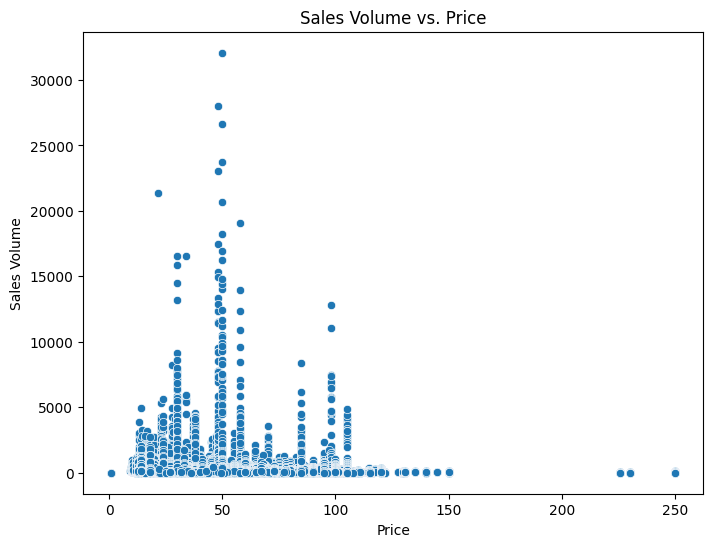

Correlation between price and sales volume:
             rsp    volume
rsp     1.000000 -0.120048
volume -0.120048  1.000000


In [39]:
# Sales volume vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rsp', y='volume', data=df)
plt.title('Sales Volume vs. Price')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.show()

# Correlation between price and sales volume
print("Correlation between price and sales volume:")
print(df[['rsp', 'volume']].corr())


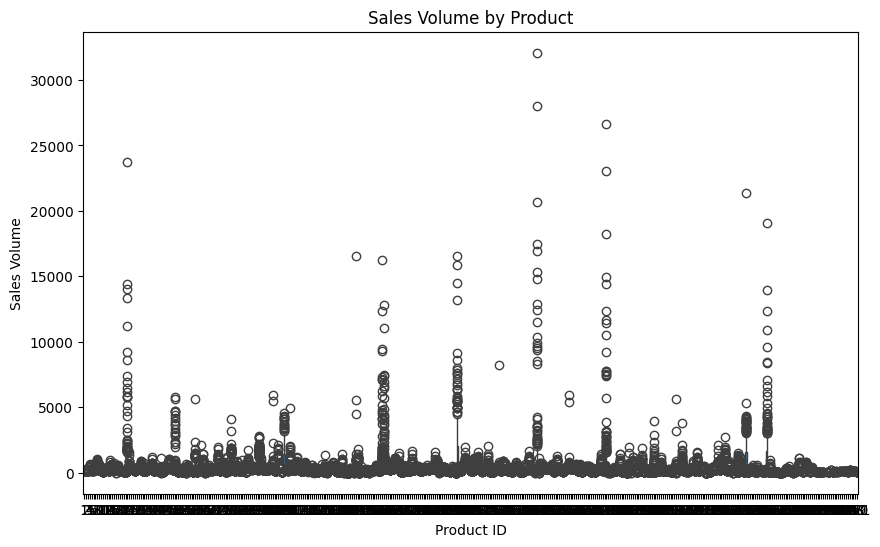

Average sales volume by product:
product_code
1       76.757497
2       64.371578
3       56.235984
4      171.852673
5       66.667536
          ...    
407     82.383764
408     58.664207
409     44.660517
410     59.051661
411     20.435424
Name: volume, Length: 411, dtype: float64


In [40]:
# Sales volume by product
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_code', y='volume', data=df)
plt.title('Sales Volume by Product')
plt.xlabel('Product ID')
plt.ylabel('Sales Volume')
plt.show()

# Average sales volume by product
print("Average sales volume by product:")
print(df.groupby('product_code')['volume'].mean())


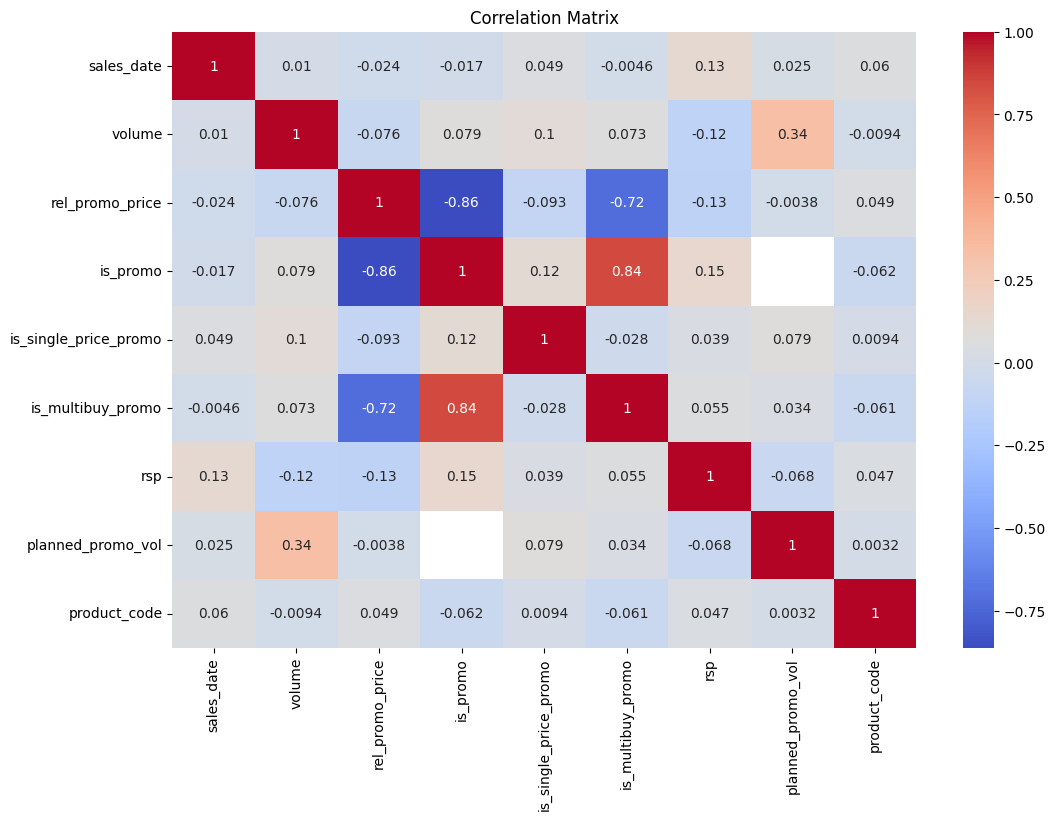

In [41]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Feature Engineering
********************************
Feature engineering involves creating new features or modifying existing ones to improve the model's performance.


In [42]:
# Extract additional time features
df['year'] = df['sales_date'].dt.year
df['month'] = df['sales_date'].dt.month
df['day'] = df['sales_date'].dt.day
df['dayofweek'] = df['sales_date'].dt.dayofweek
df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1,2022,5,1,6
1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2,2022,5,1,6
2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3,2022,5,1,6
3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4,2022,5,1,6
4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5,2022,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156,2024,6,5,2
300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147,2024,6,5,2
300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85,2024,6,5,2
300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98,2024,6,5,2


In [43]:
# Drop the original date column
# df.drop('sales_date', axis=1, inplace=True)
# df

## 6. Data Preparation
********************************

#### 6.1 Split into Train and Test Set

In [44]:
def split_time_series(df, prediction_length):
    """
    Function to split off a df of time series into time series, where the second time series
    includes the last `prediction_length` time steps.
    """
    # Create an empty dataframe for train and validation sets
    train_df = pd.DataFrame()
    validation_df = pd.DataFrame()

    # Group by the time series identifier
    grouped = df.groupby(time_series_id_col)

    # Iterate over each group (i.e., each individual time series)
    for item_id, group in grouped:
        # Sort the group by date if it's not already sorted
        group = group.sort_index()

        # Define the split point
        split_point = len(group) - prediction_length

        # Split the data into training and validation sets
        train_group = group.iloc[:split_point]
        validation_group = group

        # Append to the respective dataframes
        train_df = pd.concat([train_df, train_group])
        validation_df = pd.concat([validation_df, validation_group])

    return train_df, validation_df

train_df, test_df = split_time_series(df, prediction_length)

In [45]:
train_df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0,0,0,0,32.9500,NaN,1,2022,5,1,6
599,2022-05-02,61.0,1.0,0,0,0,32.9500,NaN,1,2022,5,2,0
843,2022-05-03,60.0,1.0,0,0,0,32.9500,NaN,1,2022,5,3,1
1409,2022-05-04,61.0,1.0,0,0,0,32.9656,NaN,1,2022,5,4,2
1485,2022-05-05,49.0,1.0,0,0,0,32.9656,NaN,1,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287531,2024-05-04,15.0,1.0,0,0,0,16.0679,NaN,411,2024,5,4,5
287796,2024-05-05,10.0,1.0,0,0,0,16.0679,NaN,411,2024,5,5,6
288185,2024-05-06,12.0,1.0,0,0,0,16.0679,NaN,411,2024,5,6,0
288598,2024-05-07,14.0,1.0,0,0,0,16.0679,NaN,411,2024,5,7,1


In [46]:
test_df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0,0,0,0,32.9500,NaN,1,2022,5,1,6
599,2022-05-02,61.0,1.0,0,0,0,32.9500,NaN,1,2022,5,2,0
843,2022-05-03,60.0,1.0,0,0,0,32.9500,NaN,1,2022,5,3,1
1409,2022-05-04,61.0,1.0,0,0,0,32.9656,NaN,1,2022,5,4,2
1485,2022-05-05,49.0,1.0,0,0,0,32.9656,NaN,1,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299032,2024-06-01,15.0,1.0,0,0,0,16.0679,NaN,411,2024,6,1,5
299331,2024-06-02,7.0,1.0,0,0,0,16.0679,NaN,411,2024,6,2,6
299673,2024-06-03,13.0,1.0,0,0,0,16.0679,NaN,411,2024,6,3,0
300005,2024-06-04,6.0,1.0,0,0,0,16.0679,NaN,411,2024,6,4,1


#### 6.2. Scaling and Normalization

In [47]:
# Encode categorical variables (if any)
# For simplicity, we'll use one-hot encoding
df = pd.get_dummies(df, columns=['product_code'], drop_first=True)
df

# Scale numerical features
scaler = StandardScaler()
df[['rel_promo_price', 'rsp', 'planned_promo_vol']] = scaler.fit_transform(df[['rel_promo_price', 'rsp', 'planned_promo_vol']])
df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,year,month,...,product_code_402,product_code_403,product_code_404,product_code_405,product_code_406,product_code_407,product_code_408,product_code_409,product_code_410,product_code_411
0,2022-05-01,61.0,0.958724,0,0,0,-0.720327,NaN,2022,5,...,False,False,False,False,False,False,False,False,False,False
1,2022-05-01,102.0,0.958724,0,0,0,-0.481447,NaN,2022,5,...,False,False,False,False,False,False,False,False,False,False
2,2022-05-01,52.0,0.958724,0,0,0,-0.725907,NaN,2022,5,...,False,False,False,False,False,False,False,False,False,False
3,2022-05-01,309.0,0.266256,1,0,0,-0.441090,-0.293253,2022,5,...,False,False,False,False,False,False,False,False,False,False
4,2022-05-01,106.0,0.266256,1,0,0,-0.330741,-0.293253,2022,5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,-0.311181,1,0,1,0.780168,-0.131083,2024,6,...,False,False,False,False,False,False,False,False,False,False
300764,2024-06-05,26.0,0.958724,0,0,0,0.762401,NaN,2024,6,...,False,False,False,False,False,False,False,False,False,False
300765,2024-06-05,71.0,0.958724,0,0,0,-1.218012,NaN,2024,6,...,False,False,False,False,False,False,False,False,False,False
300766,2024-06-05,0.0,0.958724,0,0,0,-0.619050,NaN,2024,6,...,False,False,False,False,False,False,False,False,False,False


## 7. Model Development
********************************

#### 7.1. Model Training
We will train a simple feedforward neural network to predict future sales.



In [69]:
def train_ffnn_predictor(df):
    """
    A very basic feed forward predictor using GluonTS with a training and validation set.
    """
    df = df.copy()
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index

    # Split the training data into training and validation sets
    train_df, val_df = split_time_series(df, prediction_length)
    # Create the Pandas datasets
    train_ds = PandasDataset.from_long_dataframe(train_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    val_ds = PandasDataset.from_long_dataframe(val_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    # Train a feed forward estimator
    estimator = SimpleFeedForwardEstimator(
        num_hidden_dimensions=[10],
        prediction_length=prediction_length,
        context_length=100,
        trainer=Trainer(ctx="cpu", epochs=10, learning_rate=1e-3, num_batches_per_epoch=100),
    )
    predictor = estimator.train(training_data=train_ds, validation_data=val_ds)
    return predictor

ffnn_predictor = train_ffnn_predictor(train_df)


100%|██████████| 100/100 [00:03<00:00, 29.46it/s, epoch=1/10, avg_epoch_loss=5.91]

13it [00:00, 30.24it/s, epoch=1/10, validation_avg_epoch_loss=5.44]

100%|██████████| 100/100 [00:04<00:00, 24.04it/s, epoch=2/10, avg_epoch_loss=5.44]

13it [00:00, 22.66it/s, epoch=2/10, validation_avg_epoch_loss=5.32]

100%|██████████| 100/100 [00:07<00:00, 13.28it/s, epoch=3/10, avg_epoch_loss=5.34]

13it [00:00, 27.21it/s, epoch=3/10, validation_avg_epoch_loss=5.26]

100%|██████████| 100/100 [00:05<00:00, 16.73it/s, epoch=4/10, avg_epoch_loss=5.27]

13it [00:00, 34.70it/s, epoch=4/10, validation_avg_epoch_loss=5.24]

100%|██████████| 100/100 [00:03<00:00, 30.41it/s, epoch=5/10, avg_epoch_loss=5.25]

13it [00:00, 25.38it/s, epoch=5/10, validation_avg_epoch_loss=5.28]

100%|██████████| 100/100 [00:03<00:00, 28.02it/s, epoch=6/10, avg_epoch_loss=5.2]

13it [00:00, 35.21it/s, epoch=6/10, validation_avg_epoch_loss=5.21]

100%|██████████| 100/100 [00:03<00:00, 25.27it/s, epoch=7/10, avg_epoch_loss=5.19]

#### 7.2. Model Prediction

Using the trained model to make predictions on the test dataset.

In [70]:
def make_predictions(predictor, df, feature_columns=[]):
    """
    Make predictions with a GluonTS predictor and return them as a df.
    """
    df = df.copy()
    df = df.fillna(0) # Replace any NaNs with 0
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index
    dataset = PandasDataset.from_long_dataframe(df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    forecast_it, _ = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=100,  # number of sample paths we want for evaluation
    )
    forecasts = list(forecast_it)

    # Initialize a list to hold all the records before converting to a DataFrame
    records = []
    for forecast in forecasts:
        item_id = forecast.item_id
        start_timestamp = forecast.start_date.start_time

        # GluonTS does probabilistic forecasting with a number of samples
        # Calculate mean targets across all samples for each date position
        mean_targets = forecast.samples.mean(axis=0)
        for i, target in enumerate(mean_targets):
            # Calculate what the timestamp should be for each predicted target
            timestamp = start_timestamp + i * pd.to_timedelta(freq)
            # Store the prediction as a record
            records.append({date_col: timestamp, time_series_id_col: item_id, target_col: target})

    # Convert the predictions from a list of records into a DataFrame
    preds_df = pd.DataFrame(records)
    preds_df.set_index(date_col, inplace=True)
    return preds_df

output_preds_path = "my_predictions.csv"
preds_df = make_predictions(ffnn_predictor, test_df)
preds_df.to_csv(output_preds_path)

#### 7.3. Model Evaluation

We compute the error between the forecasts and the actual sales to evaluate our model's performance. For this we main use overall relative error bias, the metric for the hackathon should probably be a weighted combination like `(1 - rE - 0.5*abs(rB)
)*100`.

In [71]:
def compute_error(actuals_path, preds_path):
    """
    Computes the relative error and relative bias from csv files of predictions and actual targets.
    """
    # Read predicted and actuals from their respective files if not already provided
    actuals_df = pd.read_csv(actuals_path, parse_dates=[date_col])
    preds_df = pd.read_csv(preds_path, parse_dates=[date_col])

    # Rename 'target' column to add suffix for 'preds' and 'actuals' respectively
    actuals_df.rename(columns={target_col: f'{target_col}_actuals'}, inplace=True)
    preds_df.rename(columns={target_col: f'{target_col}_preds'}, inplace=True)

    # Merge the two dataframes on the timestamp column and the time series identifier column
    df = pd.merge(actuals_df, preds_df, on=[date_col, time_series_id_col])

    actual_var = target_col + '_actuals'
    pred_var = target_col +'_preds'
    measure_level = [time_series_id_col, date_col]

    # Drop all unecessary columns
    keep_vars = list(set(measure_level + [actual_var, pred_var]))
    df_filtered = df.dropna(subset=[actual_var])[keep_vars]
    df_filtered.rename(columns={actual_var: 'A', pred_var: 'P'}, inplace=True)

    # Group by measure_level and aggregate A and P
    grouped = df_filtered.groupby(measure_level, observed=False).agg(A=('A', 'sum'), P=('P', 'sum'))

    # Calculate the errors initially at measure_level (not the absolute sum yet)
    grouped['E'] = (grouped['A'] - grouped['P']).abs()

    # Aggregate all data to one row
    grouped = grouped.sum()

    # Calculate relative error (rE) and relative bias (rB)
    grouped['rE'] = grouped['E'] / grouped['A']
    grouped['rB'] = (grouped['P'] - grouped['A']) / grouped['A']
    return grouped

output_preds_path = "my_predictions.csv"
report = compute_error(data_path, output_preds_path)
print("Error Report:")
print(report)

forecast_acc = (1 - (report.rE)) * 100
forecast_bias = report.rB * 100
acc_bias = forecast_acc - 0.5 * abs(forecast_bias)
print(f"Forecast Accuracy is: {forecast_acc:.2f}%")
print(f"Forecast Bias is: {forecast_bias:.2f}%")
print(f"Bias-weighted Accuracy: {acc_bias:.2f}%")

Error Report:
A     1.199319e+06
P     1.395722e+06
E     5.641571e+05
rE    4.703978e-01
rB    1.637619e-01
dtype: float64
Forecast Accuracy is: 52.96%
Forecast Bias is: 16.38%
Bias-weighted Accuracy: 44.77%



#### 7.4 Hyperparameter Tuning (optional, for more complex models)

Hyperparameter tuning involves searching for the best combination of parameters to improve the model's performance.


#### 7.4. DeepAR-based forecast

The simple feed forward predictor used previously is unable to make use of any of our features for prediction, making its usefulness limited. GluonTS provides a host of different deep-learning forecasting models which you can try out to see which works best, you can read about each one [here](https://ts.gluon.ai/stable/getting_started/models.html).

In this example, we use the DeepAR probabilistic forecasting model which you can read about [here](https://https://www.sciencedirect.com/science/article/pii/S0169207019301888?via%3Dihub).

In [75]:
from gluonts.torch import DeepAREstimator

def train_deep_ar_predictor(df, feature_columns):
    """
    A more advance model able to make use of features.
    """
    df = df.copy()
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index
    df = df.fillna(0) # Replace any NaNs with 0

    # Split the training data into training and validation sets
    train_df, val_df = split_time_series(df, prediction_length)
    # Create the Pandas datasets
    train_ds = PandasDataset.from_long_dataframe(train_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    val_ds = PandasDataset.from_long_dataframe(val_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    # Train a feed forward estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        freq=freq,
        num_feat_dynamic_real=len(feature_columns),
        trainer_kwargs={"max_epochs": 10}
    )
    predictor = estimator.train(training_data=train_ds, validation_data=val_ds)
    return predictor

# Define which features to use and train
feature_columns=['is_promo', 'rel_promo_price', 'planned_promo_vol', 'rsp']
deep_ar_predictor = train_deep_ar_predictor(train_df, feature_columns)

# Make predictions
output_preds_path = "my_deep_ar_predictions.csv"
preds_df = make_predictions(deep_ar_predictor, test_df, feature_columns)
preds_df.to_csv(output_preds_path)

# Evaluate
report = compute_error(data_path, output_preds_path)
print("DeepAR Error Report:")
print(report)

forecast_acc = (1 - (report.rE)) * 100
forecast_bias = report.rB * 100
acc_bias = forecast_acc - 0.5 * abs(forecast_bias)
print(f"Forecast Accuracy is: {forecast_acc:.2f}%")
print(f"Forecast Bias is: {forecast_bias:.2f}%")
print(f"Bias-weighted Accuracy: {acc_bias:.2f}%")

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 26.5 K | [[1, 1], [1, 1], [1, 1120, 8], [1, 1120], [1, 1120], [1, 28, 8]] | [1, 100, 28]
------------------------------------------------------------------------------------------------------------------------
26.5 K    Trainable params
0   

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'val_loss' reached 5.05753 (best 5.05753), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'val_loss' reached 5.05753 (best 5.05753), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=0-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 100: 'val_loss' reached 5.00023 (best 5.00023), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'val_loss' reached 5.00023 (best 5.00023), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=1-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 150: 'val_loss' reached 4.85754 (best 4.85754), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'val_loss' reached 4.85754 (best 4.85754), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=2-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 200: 'val_loss' reached 4.65718 (best 4.65718), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=3-step=200.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 200: 'val_loss' reached 4.65718 (best 4.65718), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=3-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 250: 'val_loss' reached 4.57799 (best 4.57799), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=4-step=250.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 250: 'val_loss' reached 4.57799 (best 4.57799), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=4-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 300: 'val_loss' reached 4.54124 (best 4.54124), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=5-step=300.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 300: 'val_loss' reached 4.54124 (best 4.54124), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=5-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 350: 'val_loss' reached 4.50559 (best 4.50559), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=6-step=350.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 350: 'val_loss' reached 4.50559 (best 4.50559), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=6-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 400: 'val_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 450: 'val_loss' reached 4.45149 (best 4.45149), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=8-step=450.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 450: 'val_loss' reached 4.45149 (best 4.45149), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=8-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 500: 'val_loss' reached 4.43071 (best 4.43071), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=9-step=500.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 500: 'val_loss' reached 4.43071 (best 4.43071), saving model to '/content/lightning_logs/version_11/checkpoints/epoch=9-step=500.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


DeepAR Error Report:
A     1.199319e+06
P     1.079674e+06
E     4.801772e+05
rE    4.003749e-01
rB   -9.976071e-02
dtype: float64
Forecast Accuracy is: 59.96%
Forecast Bias is: -9.98%
Bias-weighted Accuracy: 54.97%


## 9. Submission
********************************
Ensure your notebook runs end-to-end without errors. Save your notebook and required dependencies in a requirements.txt file. Submit your notebook to Zindi for automated evaluation.


In [ ]:
# Save the model (if required)
import joblib
# joblib.dump(best_model, 'sales_forecast_model.pkl')

print("Notebook is ready for submission!")
